<a href="https://colab.research.google.com/github/darshanvjani/ERA_vision_nlp_ai/blob/main/Pytorch%20Lightning%20%26%20Spaces/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/ERA/Session 12 Pytorch Lightning_1

/content/drive/MyDrive/ERA/Session 12 Pytorch Lightning_1


In [3]:
!pip install torchmetrics
!pip install torch_lr_finder
!pip install pytorch_lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.6/731.6 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.8/722.8 kB 8.7 MB/s eta 0:00:00


In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import torch
from utilities.model import Net
import torch.nn.functional as F
from torchsummary import summary
from utilities import config

In [6]:
torch.manual_seed(config.SEED)

#Model Initialization & Summary

In [7]:
criterion = F.cross_entropy

model = Net(
    num_classes=config.NUM_CLASSES,
    dropout_percentage=config.DROPOUT_PERCENTAGE,
    norm = config.LAYER_NORM,
    criterion =criterion,
    learning_rate=config.LEARNING_RATE,
    weight_decay=config.WEIGHT_DECAY
)

summary(model.to(config.ACCELERATOR), input_size=config.INPUT_SIZE)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
           Dropout-4           [-1, 64, 32, 32]               0
            Conv2d-5          [-1, 128, 32, 32]          73,856
         MaxPool2d-6          [-1, 128, 16, 16]               0
       BatchNorm2d-7          [-1, 128, 16, 16]             256
              ReLU-8          [-1, 128, 16, 16]               0
           Dropout-9          [-1, 128, 16, 16]               0
           Conv2d-10          [-1, 128, 16, 16]         147,584
      BatchNorm2d-11          [-1, 128, 16, 16]             256
             ReLU-12          [-1, 128, 16, 16]               0
          Dropout-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 128,

# Data Loader and Transforms

In [8]:
from utilities.transforms import train_transforms, test_transforms

In [9]:
from utilities.dataset import CIFAR10DataModule

kwargs = {'batch_size': config.BATCH_SIZE,
          'shuffle': config.SHUFFLE,
          'num_workers': config.NUM_WORKERS,
          'pin_memory': config.PIN_MEMORY}
data_module = CIFAR10DataModule(train_transforms=train_transforms, val_transforms=test_transforms, **kwargs)


## Call Prepare and Setup function for DataLoaders

In [10]:
data_module.prepare_data()
data_module.setup(stage=None)

# Now you can call train_dataloader
train_loader = data_module.train_dataloader()

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# Data Exploration

In [11]:
from utilities.visualize import plot_data_samples, plot_class_label_counts

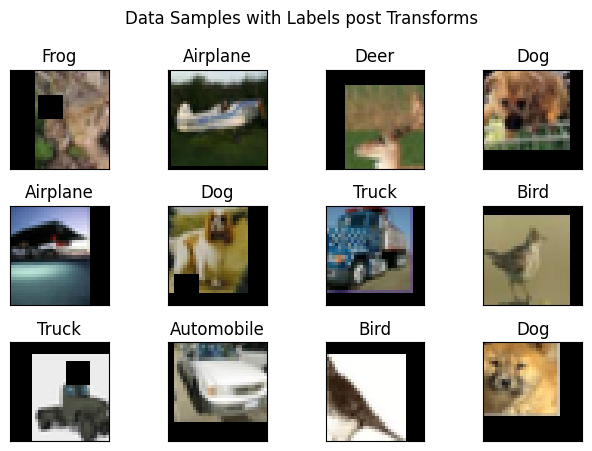

In [12]:
plot_data_samples(train_loader, classes=config.CLASSES)

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Files already downloaded and verified
Files already downloaded and verified


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


  0%|          | 0/50 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.56E-03


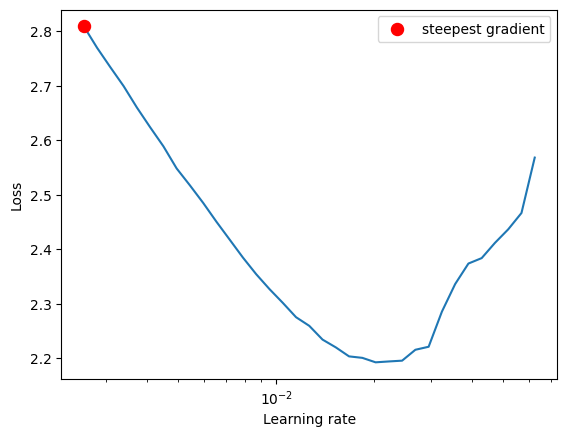

return 0.00193069772888325


Sanity Checking: 0it [00:00, ?it/s]


Epoch: 0, Val Loss: 2.303018569946289, Val Accuracy: 0.0927734375


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]


Epoch: 0, Val Loss: 1.6438324451446533, Val Accuracy: 0.4316999912261963

Epoch: 0, Train Loss: 1.818788766860962, Train Accuracy: 0.3441599905490875


Validation: 0it [00:00, ?it/s]


Epoch: 1, Val Loss: 1.158406376838684, Val Accuracy: 0.5909000039100647

Epoch: 1, Train Loss: 1.208844780921936, Train Accuracy: 0.5672199726104736


Validation: 0it [00:00, ?it/s]


Epoch: 2, Val Loss: 0.8067277073860168, Val Accuracy: 0.7204999923706055

Epoch: 2, Train Loss: 0.8991088271141052, Train Accuracy: 0.6844000220298767


Validation: 0it [00:00, ?it/s]


Epoch: 3, Val Loss: 0.7408087849617004, Val Accuracy: 0.7458000183105469

Epoch: 3, Train Loss: 0.727645993232727, Train Accuracy: 0.7465599775314331


Validation: 0it [00:00, ?it/s]


Epoch: 4, Val Loss: 0.6198990941047668, Val Accuracy: 0.7919999957084656

Epoch: 4, Train Loss: 0.6317057609558105, Train Accuracy: 0.7823200225830078


Validation: 0it [00:00, ?it/s]


Epoch: 5, Val Loss: 0.6251322627067566, Val Accuracy: 0.7928000092506409

Epoch: 5, Train Loss: 0.5662901401519775, Train Accuracy: 0.8035200238227844


Validation: 0it [00:00, ?it/s]


Epoch: 6, Val Loss: 0.458161860704422, Val Accuracy: 0.8432999849319458

Epoch: 6, Train Loss: 0.49268826842308044, Train Accuracy: 0.8307600021362305


Validation: 0it [00:00, ?it/s]


Epoch: 7, Val Loss: 0.44248712062835693, Val Accuracy: 0.8492000102996826

Epoch: 7, Train Loss: 0.433277428150177, Train Accuracy: 0.8492599725723267


Validation: 0it [00:00, ?it/s]


Epoch: 8, Val Loss: 0.4037456214427948, Val Accuracy: 0.8632000088691711

Epoch: 8, Train Loss: 0.39565661549568176, Train Accuracy: 0.8627399802207947


Validation: 0it [00:00, ?it/s]


Epoch: 9, Val Loss: 0.4889300763607025, Val Accuracy: 0.8299999833106995

Epoch: 9, Train Loss: 0.357261598110199, Train Accuracy: 0.875220000743866


Validation: 0it [00:00, ?it/s]


Epoch: 10, Val Loss: 0.38768595457077026, Val Accuracy: 0.8680999875068665

Epoch: 10, Train Loss: 0.33682936429977417, Train Accuracy: 0.8836600184440613


Validation: 0it [00:00, ?it/s]


Epoch: 11, Val Loss: 0.36559027433395386, Val Accuracy: 0.882099986076355

Epoch: 11, Train Loss: 0.30156561732292175, Train Accuracy: 0.8941199779510498


Validation: 0it [00:00, ?it/s]


Epoch: 12, Val Loss: 0.3478858470916748, Val Accuracy: 0.8866000175476074

Epoch: 12, Train Loss: 0.279257595539093, Train Accuracy: 0.9043200016021729


Validation: 0it [00:00, ?it/s]


Epoch: 13, Val Loss: 0.3850046992301941, Val Accuracy: 0.8755000233650208

Epoch: 13, Train Loss: 0.2567802667617798, Train Accuracy: 0.9107800126075745


Validation: 0it [00:00, ?it/s]


Epoch: 14, Val Loss: 0.3424720764160156, Val Accuracy: 0.8895999789237976

Epoch: 14, Train Loss: 0.23939351737499237, Train Accuracy: 0.916700005531311


Validation: 0it [00:00, ?it/s]


Epoch: 15, Val Loss: 0.3428153693675995, Val Accuracy: 0.8913999795913696

Epoch: 15, Train Loss: 0.22301723062992096, Train Accuracy: 0.9211000204086304


Validation: 0it [00:00, ?it/s]


Epoch: 16, Val Loss: 0.276138573884964, Val Accuracy: 0.9060999751091003

Epoch: 16, Train Loss: 0.20357853174209595, Train Accuracy: 0.9287999868392944


Validation: 0it [00:00, ?it/s]


Epoch: 17, Val Loss: 0.3122042417526245, Val Accuracy: 0.9003000259399414

Epoch: 17, Train Loss: 0.18075187504291534, Train Accuracy: 0.9375799894332886


Validation: 0it [00:00, ?it/s]


Epoch: 18, Val Loss: 0.292987197637558, Val Accuracy: 0.910099983215332

Epoch: 18, Train Loss: 0.16429181396961212, Train Accuracy: 0.942080020904541


Validation: 0it [00:00, ?it/s]


Epoch: 19, Val Loss: 0.26266226172447205, Val Accuracy: 0.9182000160217285

Epoch: 19, Train Loss: 0.1525600552558899, Train Accuracy: 0.9477999806404114


Validation: 0it [00:00, ?it/s]


Epoch: 20, Val Loss: 0.2535788416862488, Val Accuracy: 0.917900025844574

Epoch: 20, Train Loss: 0.13234469294548035, Train Accuracy: 0.9539399743080139


Validation: 0it [00:00, ?it/s]


Epoch: 21, Val Loss: 0.2403881847858429, Val Accuracy: 0.9243999719619751

Epoch: 21, Train Loss: 0.11851569265127182, Train Accuracy: 0.9589999914169312


Validation: 0it [00:00, ?it/s]


Epoch: 22, Val Loss: 0.23120273649692535, Val Accuracy: 0.9265000224113464

Epoch: 22, Train Loss: 0.1018628403544426, Train Accuracy: 0.9656000137329102


Validation: 0it [00:00, ?it/s]


Epoch: 23, Val Loss: 0.2248384803533554, Val Accuracy: 0.9298999905586243

Epoch: 23, Train Loss: 0.09355912357568741, Train Accuracy: 0.9693400263786316


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=24` reached.


Training, validation, and testing completed!


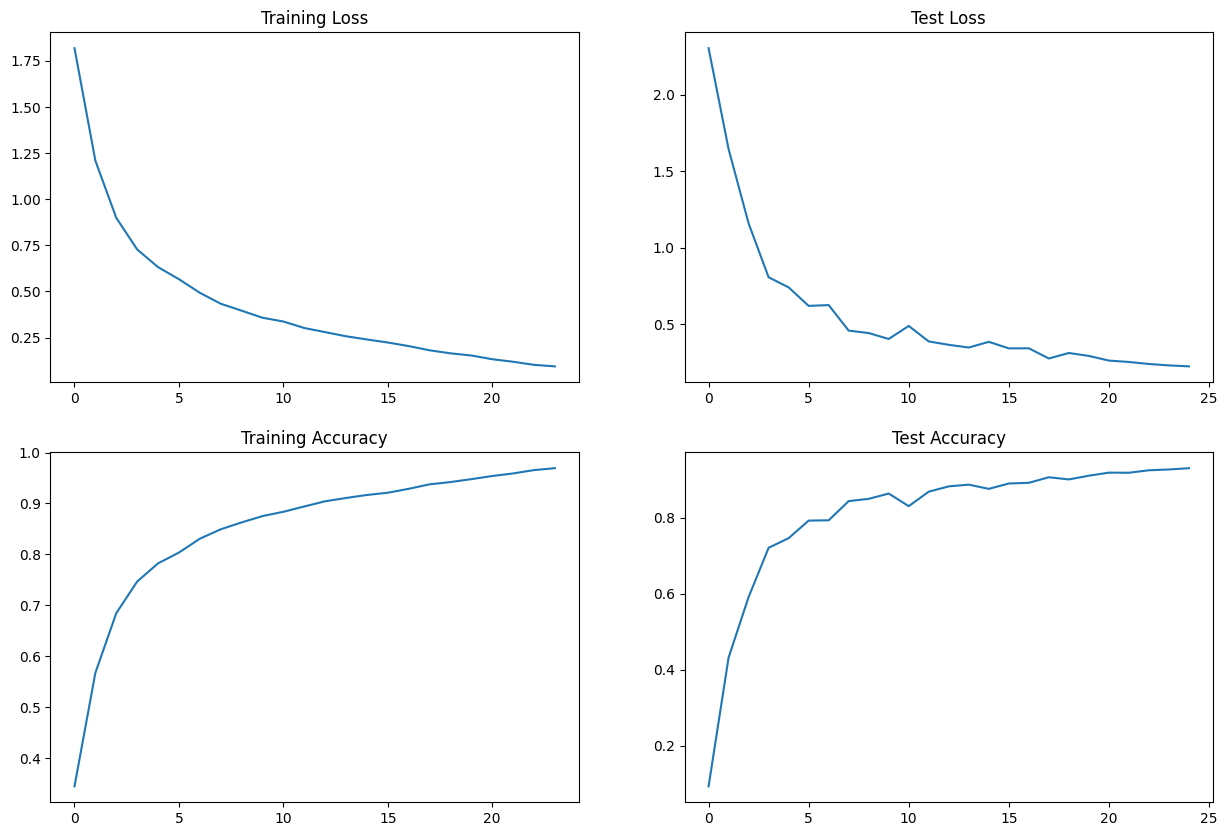

In [13]:
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelSummary
from utilities.callbacks import TrainingEndCallback, PrintLearningMetricsCallback

trainer = pl.Trainer(accelerator=config.ACCELERATOR,
                     callbacks=[ModelSummary(max_depth=0), TrainingEndCallback(), PrintLearningMetricsCallback()],
                     min_epochs=config.NUM_EPOCHS, max_epochs=config.NUM_EPOCHS)
trainer.fit(model, datamodule=data_module)

Files already downloaded and verified
Files already downloaded and verified


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]


Epoch: 24, Test Loss: 0.2248384803533554, Test Accuracy: 0.9298999905586243


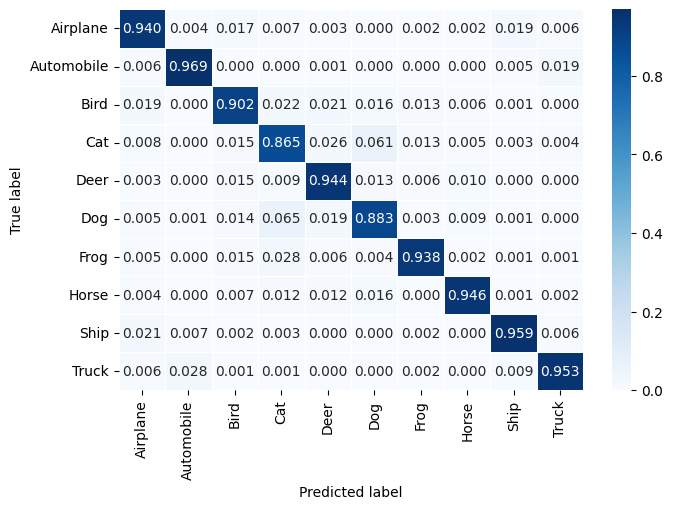

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      test_acc_epoch       │    0.9298999905586243     │
│      test_loss_epoch      │    0.2248384803533554     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss_epoch': 0.2248384803533554, 'test_acc_epoch': 0.9298999905586243}]

In [14]:
trainer.test(model=model, datamodule=data_module, verbose=True)

Total Incorrect Predictions 701


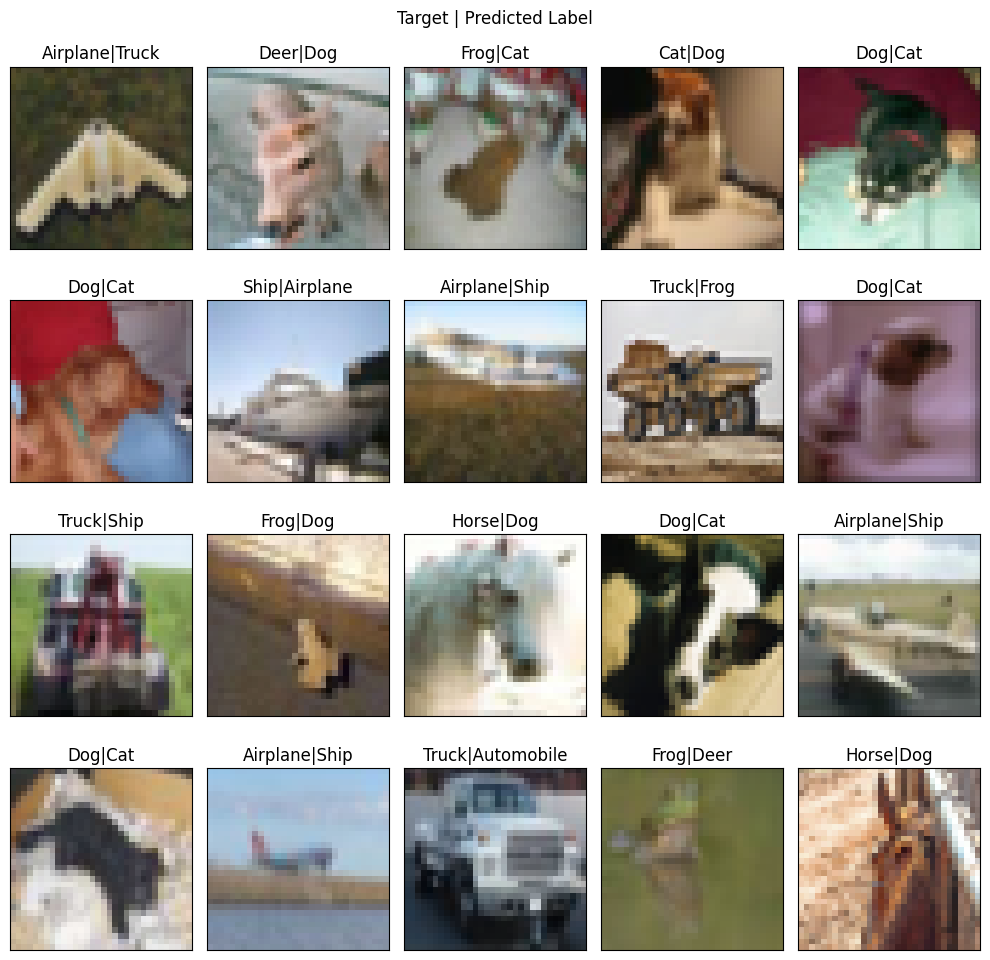

In [15]:
model.plot_incorrect_predictions_helper(num_imgs=20)